In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import linalg
from sklearn.metrics import confusion_matrix as cf
from sklearn.metrics import accuracy_score as acc_score
from sklearn.metrics import mean_squared_error
from seaborn import heatmap as hmap
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from PRML_functions import prml   ## Import the module for manual PRML functions
import warnings
import os
warnings.filterwarnings("ignore")

# Group_No_5
os.chdir(r'E:\Sem6\PRML\PA_2\PA2_Datasets\PA2_Datasets')

In [4]:
#Loading and splitting data into Train(80%),Validation(10%) and Test(10%).
my_data = np.genfromtxt('Regression_dataset.csv', delimiter=',')
X = my_data[1:,:-1]
y = my_data[1:,-1]
X_train,X_temp,y_train,y_temp = train_test_split(X,y,train_size = 0.8)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,train_size = 0.5)

Text(0.5, 1.0, 'Learning curve for linear kernel ridge regression')

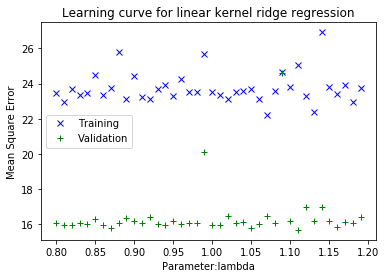

In [18]:
## Try out learning curve for choosing different parameters for linear kernel
lin_ridge = prml(X_train,y_train)
val_error =[]
train_error =[]
c_values = np.arange(0.8,1.2,0.01)
for c in c_values:
    lin_ridge.kernel_ridge_regression(gamma = c)
    val_error.append(mean_squared_error(y_val,lin_ridge.predict(X_val)))
    train_error.append(mean_squared_error(y_train,lin_ridge.predict(X_train)))
plt.plot(c_values,train_error,'bx',c_values,val_error,'g+')
plt.xlabel('Parameter:%s'%'lambda')
plt.ylabel('Mean Square Error')
plt.legend(['Training','Validation'])
plt.title('Learning curve for linear kernel ridge regression')

In [21]:
## Get Train,Test and Validation error for linear kernel
## Choosen parameters: Default parameters
lin_ridge.kernel_ridge_regression()
train_err = mean_squared_error(y_train,lin_ridge.predict(X_train))
val_err = mean_squared_error(y_val,lin_ridge.predict(X_val))
test_err = mean_squared_error(y_test,lin_ridge.predict(X_test))
print('Train Error for linear kernel:',train_err)
print('Validation Error for linear kernel:',val_err)
print('Test Error for linear kernel:',test_err)

Train Error for linear kernel: 24.12083690006508
Validation Error for linear kernel: 16.333241608142668
Test Error for linear kernel: 25.306808788968254


Text(0.5, 1.0, 'Learning curve for poly kernel ridge regression')

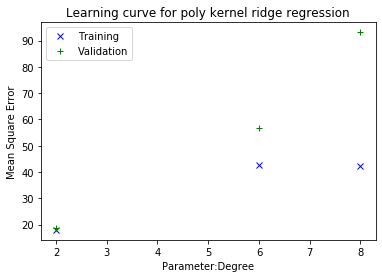

In [25]:
# Try out learning curve for choosing different parameters for polynomial kernel
poly_ridge = prml(X_train,y_train)
val_error =[]
train_error =[]
c_values = np.array([2,6,8])#np.arange(1,10,1)
for c in c_values:
    poly_ridge.kernel_ridge_regression(degree=c)
    val_error.append(mean_squared_error(y_val,poly_ridge.predict(X_val)))
    train_error.append(mean_squared_error(y_train,poly_ridge.predict(X_train)))
plt.plot(c_values,train_error,'bx',c_values,val_error,'g+')
plt.xlabel('Parameter:%s'%'Degree')
plt.ylabel('Mean Square Error')
plt.legend(['Training','Validation'])
plt.title('Learning curve for poly kernel ridge regression')

In [26]:
#### Get Train,Test and Validation error for linear kernel
## Choosen parameters: d = 2 
poly_ridge.kernel_ridge_regression(degree = 2)
train_err = mean_squared_error(y_train,poly_ridge.predict(X_train))
val_err = mean_squared_error(y_val,poly_ridge.predict(X_val))
test_err = mean_squared_error(y_test,poly_ridge.predict(X_test))
print('Train Error for linear kernel:',train_err)
print('Validation Error for linear kernel:',val_err)
print('Test Error for linear kernel:',test_err)

Train Error for linear kernel: 17.939848251578535
Validation Error for linear kernel: 18.663921463135452
Test Error for linear kernel: 41.10733614876617
